# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [206]:
import json
import pandas as pd
import numpy as np
import requests
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


bd2 = open('../data/result.json', encoding='utf8')
data = json.load(bd2)


msgs = data['messages']
dmain = pd.DataFrame(msgs)

df_new = dmain.filter(items = ['id','from', 'reply_to_message_id' ,'text'])

df_new

,id,from,reply_to_message_id,text
0,21639,NaN,NaN,
1,21647,Augusto Missino,NaN,Alguno quedó sin grupo?
2,21648,Lautaro G,NaN,Grupo: giancarlo y lautaro
3,21652,Lucas Galdame Villegas,NaN,"Grupo: Lucas g\nGaldame, Gaston Fenske y Danie..."
4,21656,Julián,NaN,Grupo: Delfina Quinteros y Julián Navarrete
5,21657,Emiliano Muñoz,21647.0,Estamos con lucas ollarce por si queres ser co...
6,21659,NaN,NaN,
7,21665,Augusto Missino,21657.0,Bueno
8,21674,Delfina Quinteros,21656.0,si alguien todavia no tiene grupo puede ser co...
9,21677,Emiliano Muñoz,NaN,"Grupo: Emiliano, Lucas Ollarce, Augusto"


De esta manera obtenemos los ID de los usuarios y sus mensajes

## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [207]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   53 non-null     int64  
 1   from                 48 non-null     object 
 2   reply_to_message_id  7 non-null      float64
 3   text                 53 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


Messages: Lista con diccionarios con todos los usuarios donde se pueden ver los siguientes campos dentro del diccionario:
"id": Representa el ID del usuario en el grupo ejemplo: "21639"
"from": Quien es el emisor del mensaje ejemplo "Jose Ruti"
"reply_to_message_id": Son los mensajes que responden a un mensaje mandado por otro integrante
"text": mensaje que se envia ""

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

In [208]:
missing = []
for column in df_new.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(df_new[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(df_new[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,id,0.000000,0
1,from,9.433962,5
2,reply_to_message_id,86.792453,46
3,text,0.000000,0


Al revisar los datos faltantes podemos ver que hay faltantes en dos columnas "from" y "reply_to_message_id"

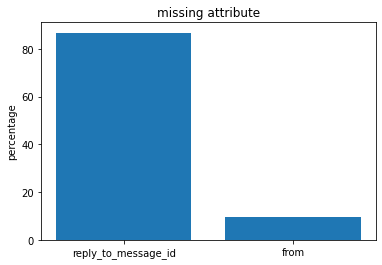

In [209]:
missing_df = missing_df.sort_values('percentage', ascending=False)

df_new_p = missing_df.loc[(missing_df['percentage'] > 0)]

plt.bar(df_new_p["column"], df_new_p["percentage"])
plt.ylabel('percentage')
plt.title('missing attribute')
plt.show() 

Graficamente se puede observar que "reply_to_message_id" tiene mas del 80% de datos faltantes y "from" tiene casi el 10%

In [210]:
df_global = df_new.copy(deep=False)

media = df_global['reply_to_message_id'].mean()

df_global['reply_to_message_id'] = df_global['reply_to_message_id'].fillna(media)

df_global['from'] = df_global['from'].fillna('user')

df_global

,id,from,reply_to_message_id,text
0,21639,user,22661.285714,
1,21647,Augusto Missino,22661.285714,Alguno quedó sin grupo?
2,21648,Lautaro G,22661.285714,Grupo: giancarlo y lautaro
3,21652,Lucas Galdame Villegas,22661.285714,"Grupo: Lucas g\nGaldame, Gaston Fenske y Danie..."
4,21656,Julián,22661.285714,Grupo: Delfina Quinteros y Julián Navarrete
5,21657,Emiliano Muñoz,21647.000000,Estamos con lucas ollarce por si queres ser co...
6,21659,user,22661.285714,
7,21665,Augusto Missino,21657.000000,Bueno
8,21674,Delfina Quinteros,21656.000000,si alguien todavia no tiene grupo puede ser co...
9,21677,Emiliano Muñoz,22661.285714,"Grupo: Emiliano, Lucas Ollarce, Augusto"


Decidimos utilizar este metodo para remplazar los valores faltantes por numero ya que en la columna "reply_to_message_id" contiene valores float y decidimos reemplazar estos mismo por un numero fuera del rango para seguir adelante con el analisis.

En la columna "from" cambiamos los faltantes por user ya que pueden ser personas que abandonaron el grupo y no conseguimos el nombre que utilizan en telegram

In [211]:
missing = []
for column in df_new.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(df_global[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(df_global[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,id,0.0,0
1,from,0.0,0
2,reply_to_message_id,0.0,0
3,text,0.0,0


Una vez hecho todos los remplazos podemos observar que no hay faltantes en ninguna columna

## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [212]:
df_new.describe()

,id,reply_to_message_id
count,53.000000,53.000000
mean,25960.000000,22661.285714
std,3385.612551,897.638006
min,21639.000000,21647.000000
25%,21685.000000,22661.285714
50%,28654.000000,22661.285714
75%,28710.000000,22661.285714
max,28753.000000,28654.000000


In [213]:
Q1 = df_global.quantile(0.25)
Q3 = df_global.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                     7025.0
reply_to_message_id       0.0
dtype: float64


Se toma el valor entre el tercer y el primer cuartil de la distribucion

IQR = Se asume que cualquier valor fuera de este rango es un valor atipico

In [214]:
lower_rank = Q1 - 1.5 * IQR
upper_rank = Q3 + 1.5 * IQR

In [215]:
print("Top rank")
print(lower_rank)
print("Lower range")
print(upper_rank)

Top rank
id                     11147.500000
reply_to_message_id    22661.285714
dtype: float64
Lower range
id                     39247.500000
reply_to_message_id    22661.285714
dtype: float64


In [216]:
df_outliers = (df_global < lower_rank) | (df_global > upper_rank)
df_outliers

<ipython-input-216-e52963cf66ca>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df_global < lower_rank) | (df_global > upper_rank)
<ipython-input-216-e52963cf66ca>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df_global < lower_rank) | (df_global > upper_rank)


,from,id,reply_to_message_id,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,True,False
8,False,False,True,False
9,False,False,False,False


<AxesSubplot:>

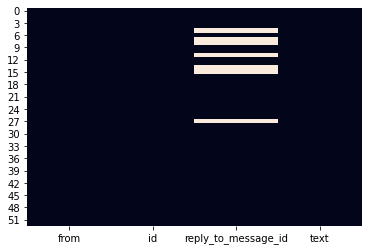

In [217]:
sns.heatmap(df_outliers, cbar=False)

<AxesSubplot:>

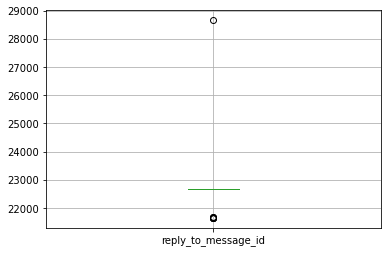

In [218]:
df_global.boxplot(column='reply_to_message_id')



<AxesSubplot:xlabel='reply_to_message_id'>

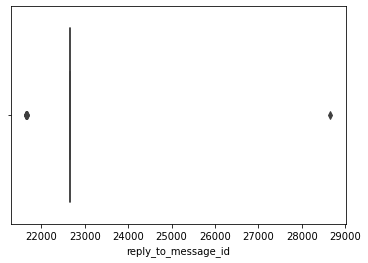

In [219]:
sns.boxplot(x=df_global['reply_to_message_id'])

<AxesSubplot:>

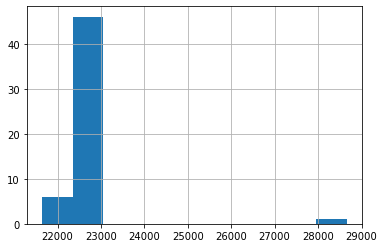

In [220]:
df_global.reply_to_message_id.hist()

22661.285714285714
21877.85714285714


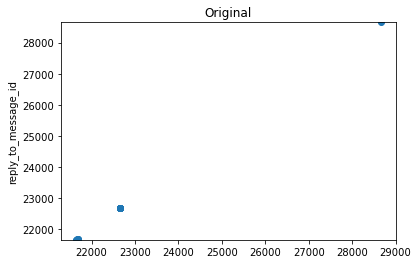

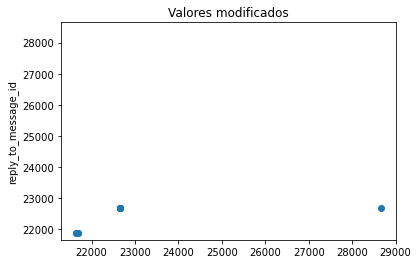

In [221]:
reply_q_sup = df_global['reply_to_message_id'].quantile(0.90)
reply_q_inf = df_global['reply_to_message_id'].quantile(0.10)
print(reply_q_sup)
print(reply_q_inf)

df_fc = df_global.copy(deep = True)
df_fc.loc[df_fc["reply_to_message_id"] <= reply_q_inf,"reply_to_message_id"] = reply_q_inf
df_fc.loc[df_fc["reply_to_message_id"] >= reply_q_sup, "reply_to_message_id"] = reply_q_sup

plt.scatter(df_global["reply_to_message_id"],df_global["reply_to_message_id"])
plt.title('Original')
plt.ylim(min(df_global['reply_to_message_id']),max(df_global['reply_to_message_id']))
plt.ylabel('reply_to_message_id')
plt.show() 

plt.scatter(df_global["reply_to_message_id"],df_fc["reply_to_message_id"])
plt.title('Valores modificados')
plt.ylim(min(df_global['reply_to_message_id']),max(df_global['reply_to_message_id']))
plt.ylabel('reply_to_message_id')
plt.show() 

- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

Existen valores atipicos. Los valores atípicos pueden tener un efecto desproporcionado en los resultados estadísticos, como la media, lo que puede conducir a interpretaciones engañosas. Esto sucede a que la mayoria de los participantes del grupo no replicaron ningun mensaje y por este motivo tenemos valores atipicos